In [1]:
import os
import pandas as pd
import plotly as py

In [77]:
#grep TAdv SH510050_P7956.tcsv |sed 's/^.*TAdv,//g' > TAdv.csv
srcdatahome = 'd:/workspace.t3600/HyperPixiu/out/sim_offline'
# dfSample = pd.read_csv(srcdatahome + '/SH510050.csv.bz2', names=['date','time','open','high','low','close','volume','amount'], compression='bz2', error_bad_lines=False)
dfSample = pd.read_csv(srcdatahome + '/TAdv.csv', error_bad_lines=False)
# del dfSample['symbol']
del dfSample['exchange']
dfSample.set_index('datetime', inplace = True)
# dfSample

In [78]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import warnings; warnings.simplefilter('ignore')
# import seaborn as sns; sns.set()
get_ipython().magic(u'matplotlib inline')


In [86]:
dfPlot =dfSample[['price','dirLONG','dirSHORT']]
dfPlot['date'] = [ x[:x.index(' ')] for x in dfPlot.index]
dfPlot['time'] = [ x[x.index(' '):] for x in dfPlot.index]
# bydate = dfPlot.groupby(['date'])
dfPlot['dt'] = pd.to_datetime(dfPlot['date']) - pd.to_timedelta(7, unit='d')
bydate = dfPlot.groupby([pd.Grouper(key='dt', freq='W-MON')])
# bydate.get_group('2013-01-14')
for i in bydate.nunique().index:
    print(i)

2012-12-31 00:00:00
2013-01-07 00:00:00
2013-01-14 00:00:00
2013-01-21 00:00:00
2013-01-28 00:00:00
2013-02-04 00:00:00
2013-02-11 00:00:00
2013-02-18 00:00:00
2013-02-25 00:00:00
2013-03-04 00:00:00
2013-03-11 00:00:00
2013-03-18 00:00:00
2013-03-25 00:00:00
2013-04-01 00:00:00
2013-04-08 00:00:00
2013-04-15 00:00:00
2013-04-22 00:00:00
2013-04-29 00:00:00
2013-05-06 00:00:00
2013-05-13 00:00:00


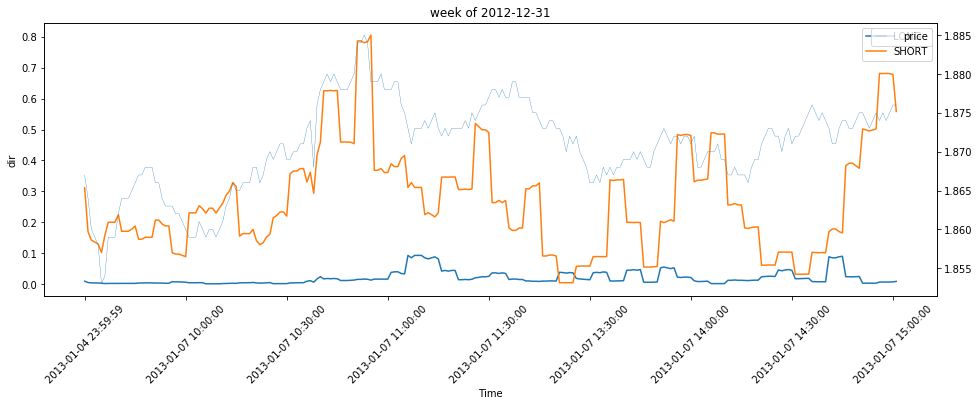

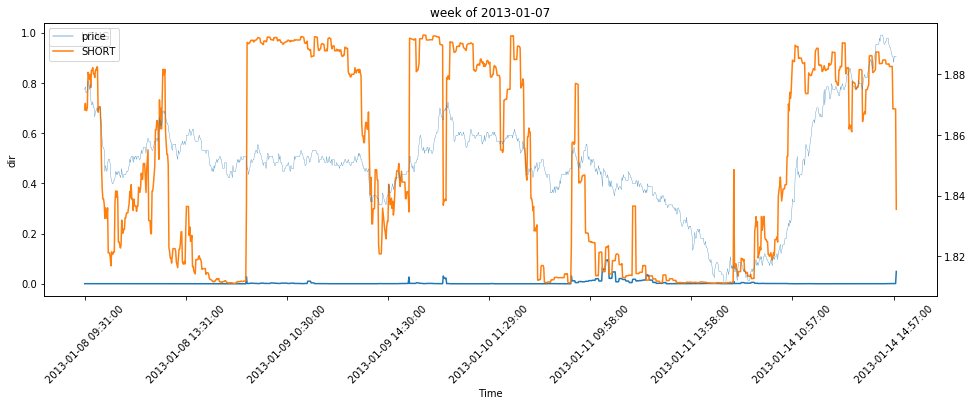

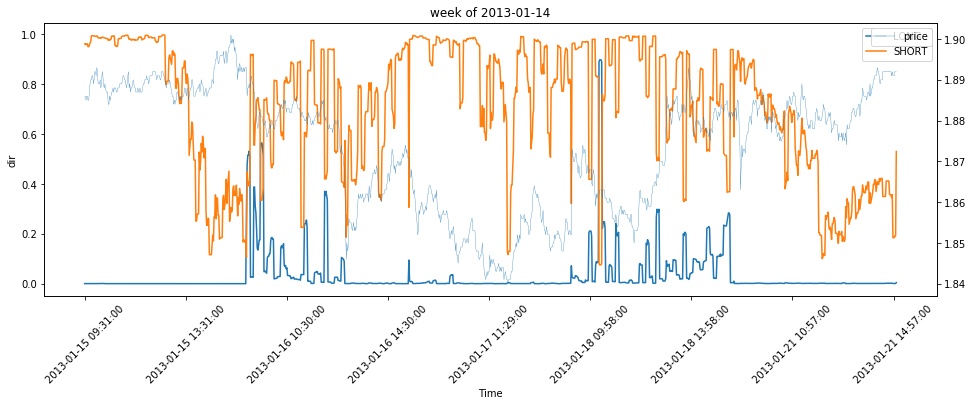

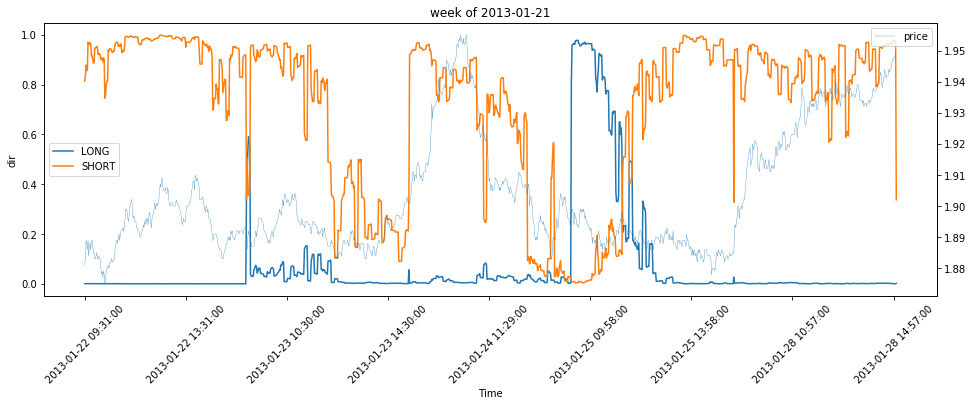

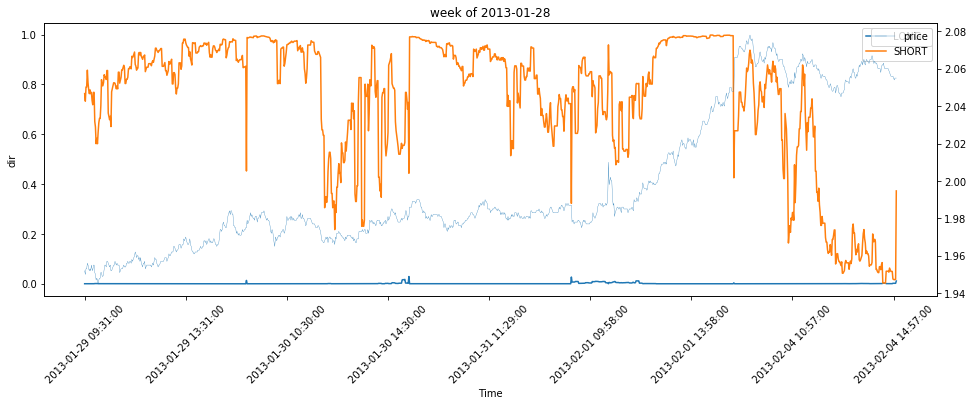

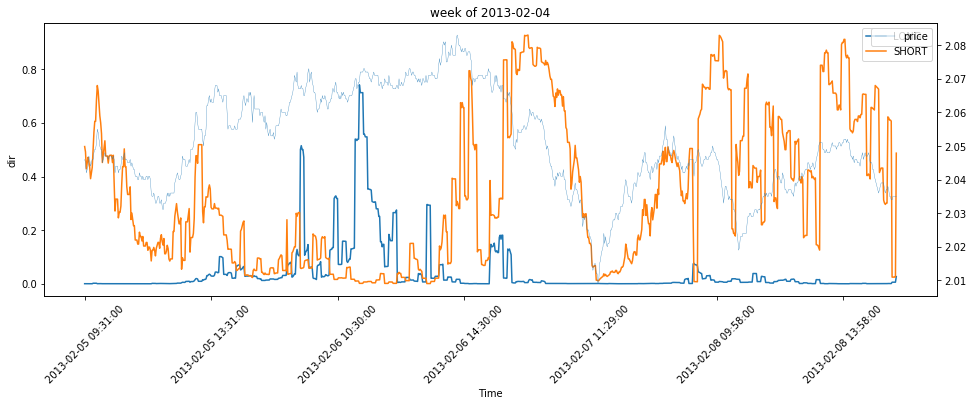

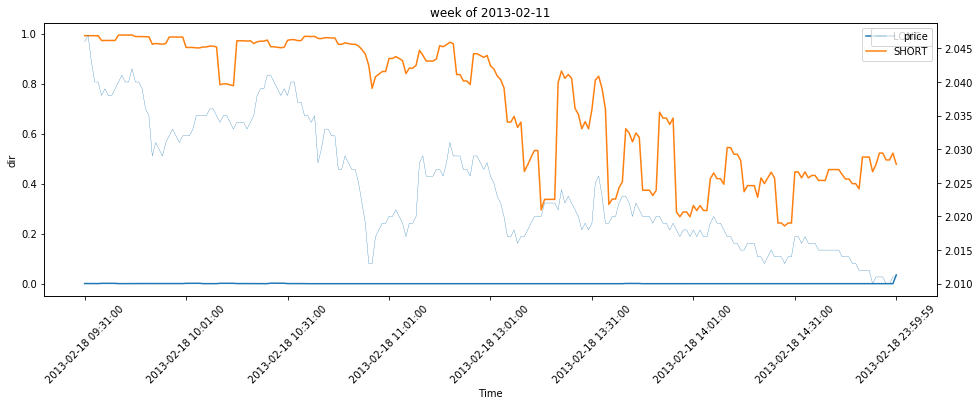

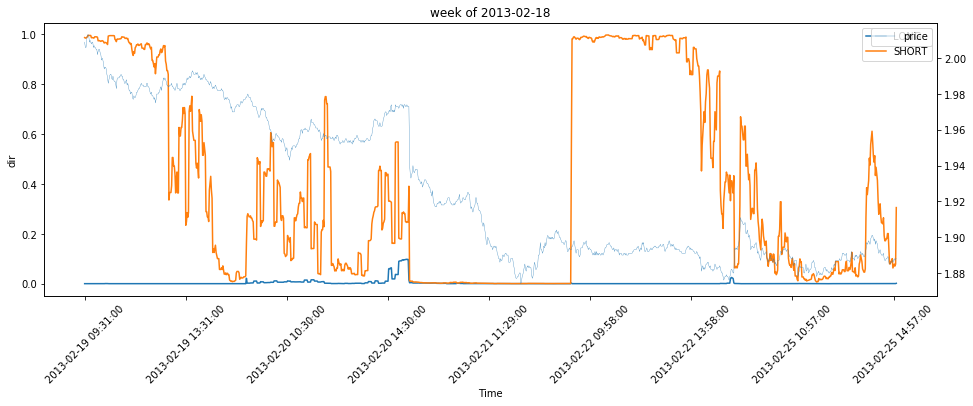

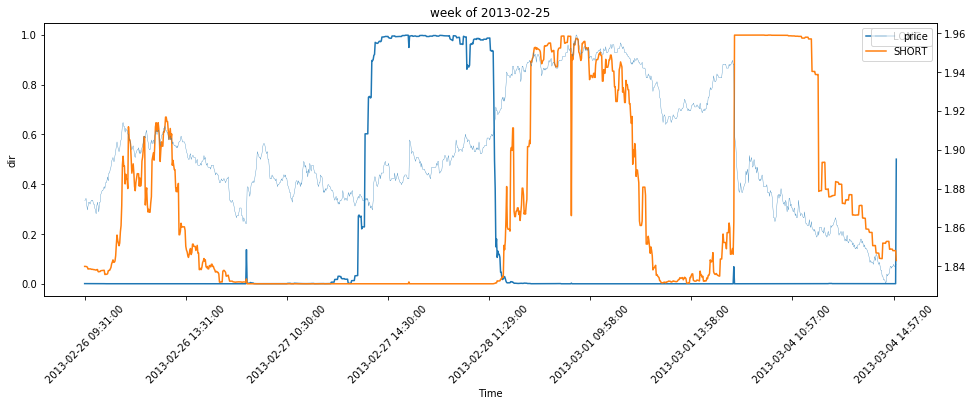

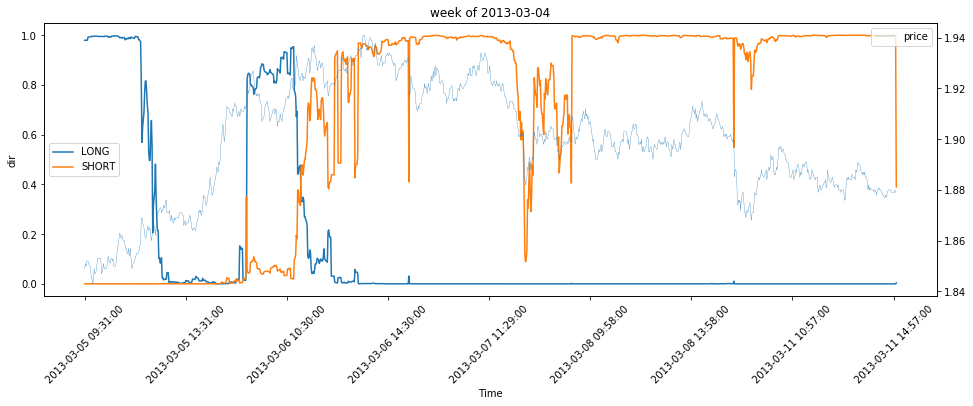

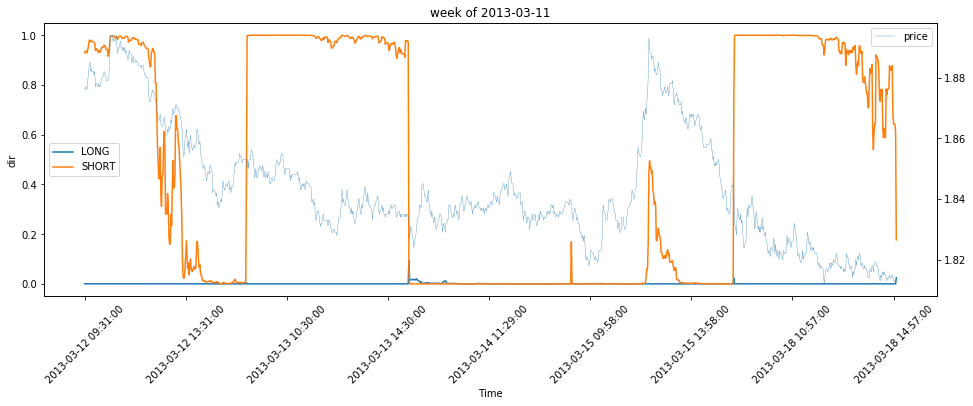

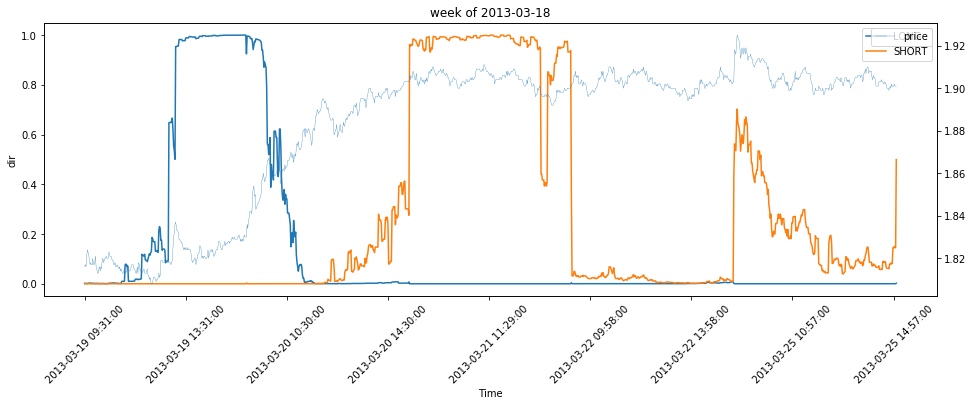

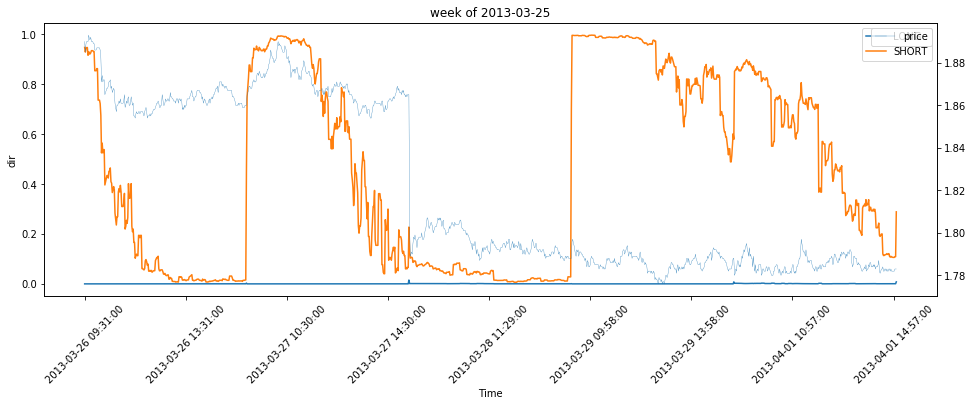

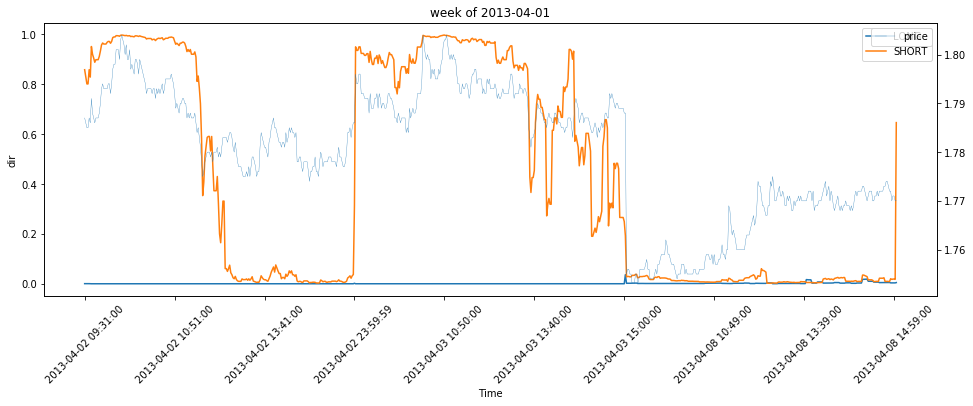

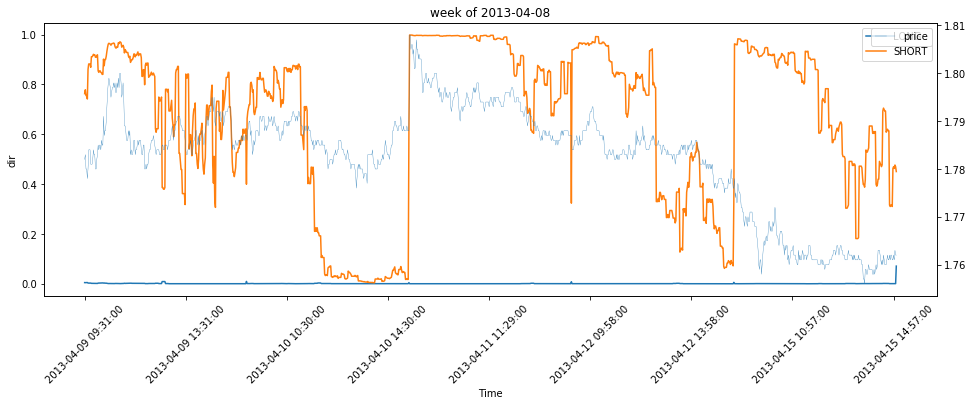

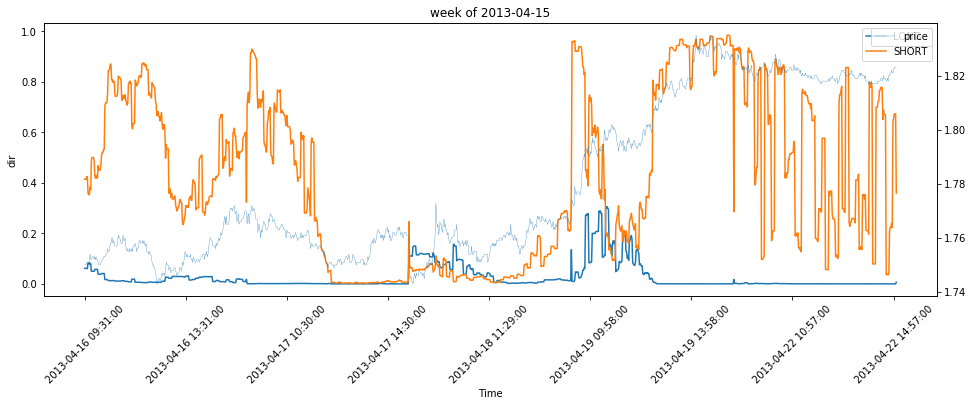

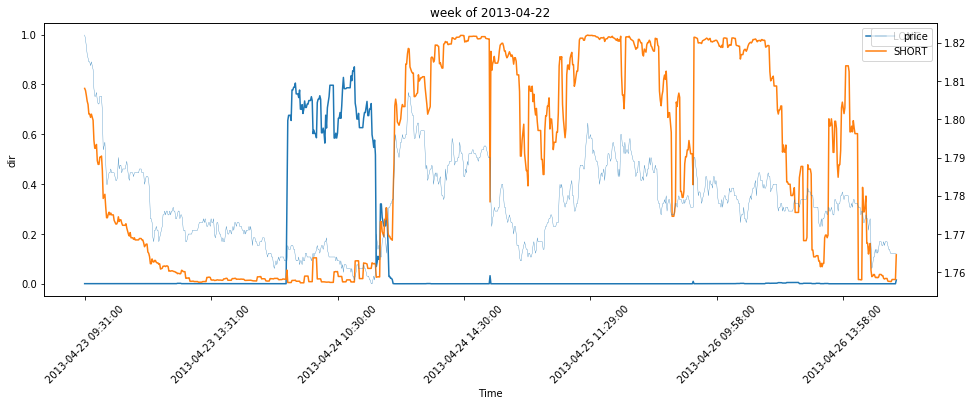

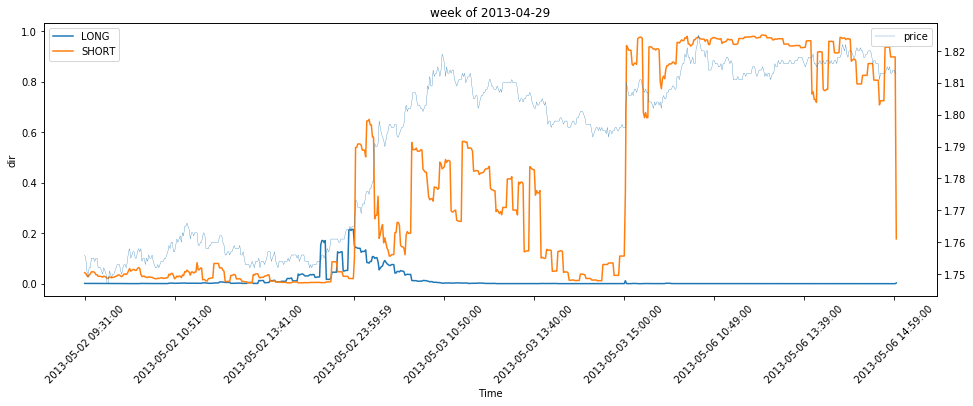

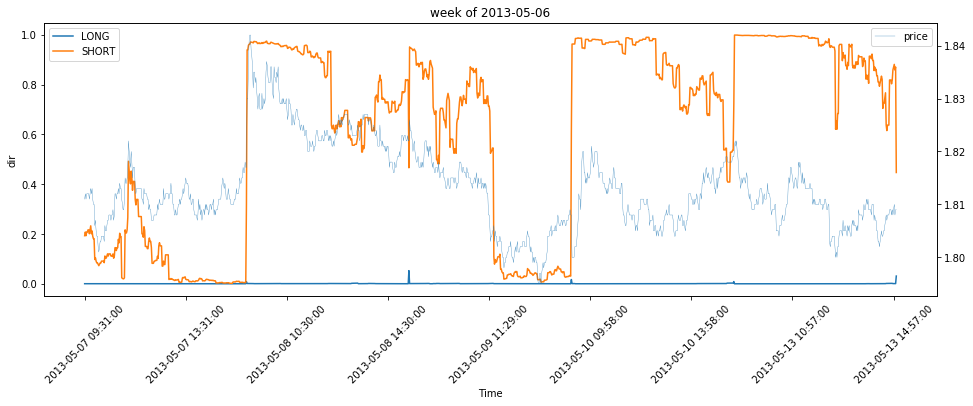

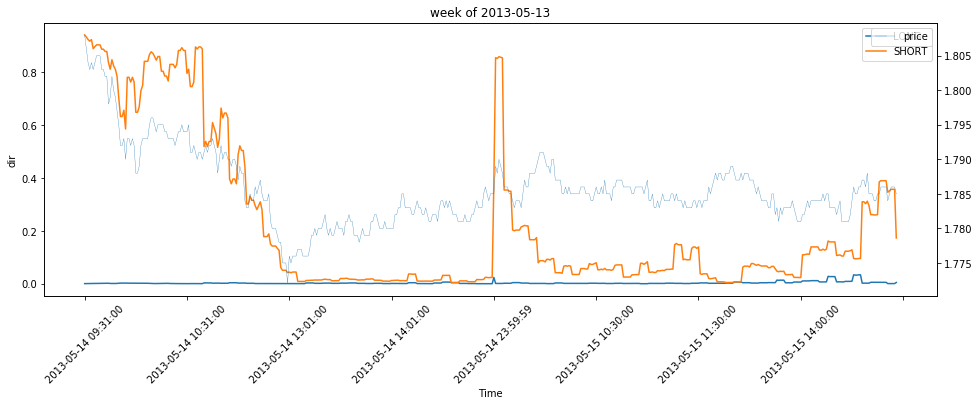

In [89]:
for d in bydate.nunique().index:
    dataToPlot =bydate.get_group(d)
    # dataToPlot.set_index('time', inplace = True)

    fig, ax = plt.subplots(figsize=(16,10))
    fig.subplots_adjust(bottom=0.5)

    # plt.plot(dfPlot, lw=1.5)
    plt.plot(dataToPlot['dirLONG'], lw=1.5, label='LONG')
    plt.legend(loc=0)
    plt.plot(dataToPlot['dirSHORT'], lw=1.5, label='SHORT')
    plt.legend(loc=0)
    plt.ylabel('dir')

    # plt.grid(True)
    plt.axis('tight')
    plt.xticks(rotation=45)
    plt.xlabel('Time')
    plt.title('week of %s' % d.strftime('%Y-%m-%d'))

    # the right Y
    ax2 = ax.twinx()
    plt.plot(dataToPlot['price'], lw=0.3, label='price')
    plt.legend(loc=0)

    ax.xaxis.set_major_locator(ticker.MaxNLocator(10)) #共10个刻度
    plt.show()


In [135]:
# 导入两个涉及的库
# https://blog.csdn.net/u014281392/article/details/73611624
from matplotlib.pylab import date2num
import datetime
import copy

# 对tushare获取到的数据转换成candlestick_ohlc()方法可读取的格式
'''
data_list = []
for dates,row in hist_data.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(dates,'%Y-%m-%d')
    t = date2num(date_time)
    open,high,low,close = row[:4]
    datas = (t,open,high,low,close)
    data_list.append(datas)
'''
def datetime_to_num(asOfs):
    num_time = []
    for date in asOfs:
        date_time = datetime.datetime.strptime(date,'%Y/%m/%d %H:%M')
        num_date = date2num(date_time)
        num_time.append(num_date)
    return num_time

# date_to_num(map(str.__add__,df.values[:,0],df.values[:,1]))
# df.values[:,0]
# map(str.__add__,a,b)
df = copy.deepcopy(dfSample.head(200))
df.insert(0,'t', datetime_to_num(df.index))
quotes = df.values
#quotes[:,0] = datetime_to_num(df.index)
# quotes
# df['open'].values
# df
#datetime_to_num()
# df.values[:-5]

quotes = zip(datetime_to_num(df.index), df['open'], df['high'], df['low'], df['close'], df['volume'], df['color'])
quotes

[(734686.3965277778, 19.34, 19.34, 19.15, 19.32, 54.0, 'red'),
 (734686.3972222222, 19.32, 19.32, 19.32, 19.32, 0.0, 'green'),
 (734686.3979166667, 19.3, 19.32, 19.3, 19.32, 23.0, 'green'),
 (734686.3986111111, 19.32, 19.32, 19.32, 19.32, 26.0, 'green'),
 (734686.3993055555, 19.33, 19.33, 19.32, 19.33, 119.0, 'green'),
 (734686.4, 19.33, 19.33, 19.33, 19.33, 7.0, 'green'),
 (734686.4006944444, 19.33, 19.33, 19.32, 19.32, 21.0, 'red'),
 (734686.401388889, 19.32, 19.32, 19.32, 19.32, 2.0, 'green'),
 (734686.4020833333, 19.32, 19.32, 19.32, 19.32, 1.0, 'green'),
 (734686.4027777778, 19.32, 19.33, 19.32, 19.32, 59.0, 'green'),
 (734686.4034722223, 19.32, 19.33, 19.32, 19.32, 47.0, 'green'),
 (734686.4041666667, 19.33, 19.34, 19.33, 19.34, 44.0, 'green'),
 (734686.4048611111, 19.34, 19.38, 19.34, 19.38, 10.0, 'green'),
 (734686.4055555556, 19.38, 19.39, 19.38, 19.38, 128.0, 'green'),
 (734686.40625, 19.38, 19.39, 19.36, 19.39, 23.0, 'green'),
 (734686.4069444444, 19.37, 19.37, 19.36, 19.36,

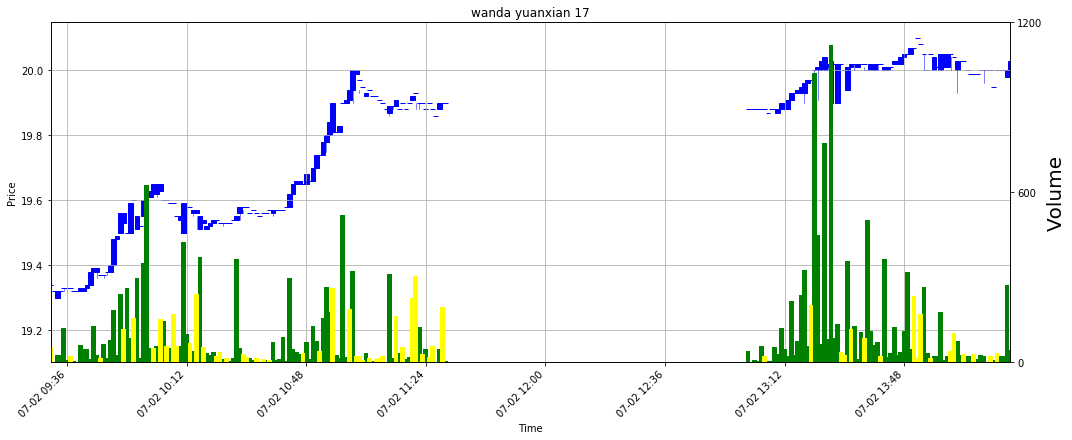

In [138]:
# https://blog.csdn.net/u014281392/article/details/73611624
import matplotlib.pyplot as plt
import mpl_finance as mpf #import matplotlib.finance as mpf
import matplotlib.dates as mdates
import matplotlib
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(15,10))
fig.subplots_adjust(bottom=0.5)
barwidth = 0.2/(len(quotes))

mpf.candlestick_ochl(ax, quotes, width=barwidth, colorup='b', colordown='r', alpha=1)
plt.grid(True) # 背景格子

# 设置日期刻度旋转的角度 
plt.xticks(rotation=60)
plt.title('wanda yuanxian 17')
plt.xlabel('Time')
plt.ylabel('Price')

# x轴的刻度为日期
ax.xaxis_date()
plt.xticks(rotation=45)
# ax.xaxis.set_major_locator(mdates.HourLocator())
# ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 15, 30, 45],
#                                                 interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
ax.xaxis.set_major_locator(ticker.MaxNLocator(10)) #10个刻度
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# create the second axis for the volume bar-plot
ax2 = ax.twinx()
# set the position of ax2 so that it is short (y2=0.32) but otherwise the same size as ax
ax2.set_position(matplotlib.transforms.Bbox([[0.125,0.1],[0.9,0.32]]))

# get data from candlesticks for a bar plot
dates = [x[0] for x in quotes]
dates = np.asarray(dates)
volume = [x[5] for x in quotes]
volume = np.asarray(volume)

# make bar plots and color differently depending on up/down for the day
ups   = df['open']-df['close']<=0
downs = df['open']-df['close']>0
ax2.bar(dates[ups],volume[ups],color='green',width=barwidth,align='center')
ax2.bar(dates[downs],volume[downs],color='yellow',width=barwidth,align='center')

#scale the x-axis tight
ax2.set_xlim(min(dates),max(dates))
# the y-ticks for the bar were too dense, keep only every third one
yticks = ax2.get_yticks()
ax2.set_yticks(yticks[::3])

ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Volume', size=20)

# format the x-ticks with a human-readable date. 
# xt = ax.get_xticks()
# new_xticks = [datetime.date.isoformat(num2date(d)) for d in xt]
# ax.set_xticklabels(new_xticks, rotation=45, horizontalalignment='right')

plt.ion()
plt.tight_layout()


In [125]:
plt.show()

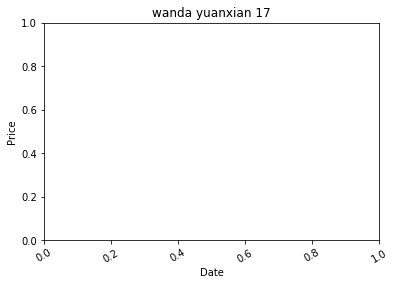

In [10]:
# 设置日期刻度旋转的角度 
plt.xticks(rotation=30)
plt.title('wanda yuanxian 17')
plt.xlabel('Date')
plt.ylabel('Price')
# x轴的刻度为日期
ax.xaxis_date ()